In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
%matplotlib inline
### imports ###
import sys
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

# import custom functions
sys.path.insert(0, '/home/h1bennet/code/')
from homer_preprocessing import import_homer_diffgene, read_homer_gene_exp
from plotting_scripts import plot_exp_rpkm, gene_list_bar_plot

Goal is easy visualization of gene expression across hepatic cell types.

In [2]:
tpm = pd.read_csv(
    '/gpfs/data01/glasslab/home/h1bennet/strains_rna/results/A01_Strains_AMLN_AllSamples_RNA/expression/rawT.txt',
    index_col=0,
    sep='\t')

In [3]:
# Kupffer
kc_groups = [[0,1,2,3],
             [4,5,6],
             [7,8,9,10]]

kc_group_labels = ['C57BL/6J Kupffer AMLN Diet',
                   'Balb/cJ Kupffer AMLN Diet',
                   'AJ Kupffer AMLN Diet']

kc_colors = ['#4daf4a', '#377eb8', '#e41a1c']

# Hepatocyte
hep_groups = [[11,12,13],
             [14,15,16],
             [17,18,19]]

hep_group_labels = ['C57BL/6J Hepatocyte AMLN Diet',
                    'Balb/cJ Hepatocyte AMLN Diet',
                    'AJ Hepatocyte AMLN Diet']

hep_colors = ['#4daf4a', '#377eb8', '#e41a1c']

# LSEC
lsec_groups = [[20,21],
               [22,23],
               [26,27]]

lsec_group_labels = ['C57BL/6J LSEC AMLN Diet',
                     'Balb/cJ LSEC AMLN Diet',
                     'AJ LSEC AMLN Diet']

lsec_colors = ['#4daf4a', '#377eb8', '#e41a1c']

# Stellate
stel_groups = [[28,29],
               [30,31],
               [32,33]]

stel_group_labels = ['C57BL/6J Stellate AMLN Diet',
                     'Balb/cJ Stellate AMLN Diet',
                     'AJ Stellate AMLN Diet',]

stel_colors = ['#4daf4a', '#e41a1c', '#377eb8']

Make legend

In [4]:
strain_labels = ['C57BL6/J', 'BALB/cJ', 'AJ']
strain_colors = ['#4daf4a', '#377eb8', '#e41a1c']

In [5]:
legend_elements = []
for lab, col in  zip(strain_labels, strain_colors):
    legend_elements.append(Patch(label=lab, color=col))

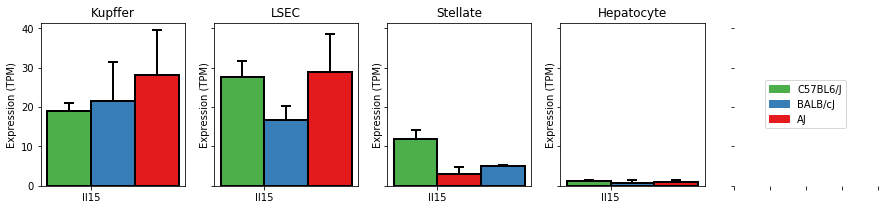

In [6]:
gene = ['Il15']

fig, axs = plt.subplots(1, 5,
                       figsize=(15, 3),
                       sharey=True)
plt.subplots_adjust(wspace=0.2)

for group, label, color, ax in zip([kc_groups,lsec_groups,stel_groups,hep_groups],
                                   [kc_group_labels,lsec_group_labels,stel_group_labels,hep_group_labels],
                                   [kc_colors,lsec_colors,stel_colors,hep_colors],
                                   axs.flatten()[:4]):

    gene_list_bar_plot(gene,
                       tpm,
                       groups=group,
                       group_labels = label,
                       colors = color,
                       width=0.2, 
                       ax=ax)
    ax.set_title(label[0].split(' ')[1])

    ax.get_legend().remove()

axs[4].legend(handles=legend_elements, loc='center');
axs[4].spines['top'].set_visible(False);
axs[4].spines['right'].set_visible(False);
axs[4].spines['left'].set_visible(False);
axs[4].spines['bottom'].set_visible(False);
axs[4].set_xticklabels('');
# axs[4].set_yticklabels('')